In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [35]:
X = [ [14, 5], [16, 5], [6, 0], [10, 1], [8, 2], [15, 6], [15, 7], [8, 2], [8, 1], [15, 4] ]
x = np.array(X)
y = [1,1,0,0,0,1,1,0,0,1]
print(x)
print(y)

[[14  5]
 [16  5]
 [ 6  0]
 [10  1]
 [ 8  2]
 [15  6]
 [15  7]
 [ 8  2]
 [ 8  1]
 [15  4]]
[1, 1, 0, 0, 0, 1, 1, 0, 0, 1]


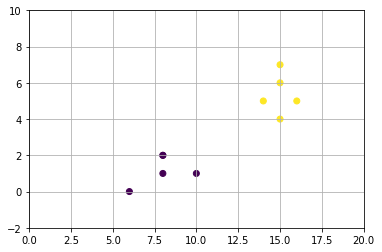

In [36]:
plt.scatter(x[:,0],x[:,1],marker='o',c=y)
plt.grid()
plt.xlim(0,20)
plt.ylim(-2,10)
plt.show()

In [37]:
avg = x.mean(axis=0)
print(avg)

[11.5  3.3]


In [38]:
newx = x-avg
print(newx)

[[ 2.5  1.7]
 [ 4.5  1.7]
 [-5.5 -3.3]
 [-1.5 -2.3]
 [-3.5 -1.3]
 [ 3.5  2.7]
 [ 3.5  3.7]
 [-3.5 -1.3]
 [-3.5 -2.3]
 [ 3.5  0.7]]


plt.scatter(newx[:,0],newx[:,1],marker='o',c=y)
plt.grid()
plt.xlim(-5,5)
plt.ylim(-6,7)
plt.show()

In [42]:
covM=np.dot(newx.T, newx)
print(newx.T)
covM=covM/( len(newx) -1 )

print('Covariance Matrix: ')
print(covM)

[[ 2.5  4.5 -5.5 -1.5 -3.5  3.5  3.5 -3.5 -3.5  3.5]
 [ 1.7  1.7 -3.3 -2.3 -1.3  2.7  3.7 -1.3 -2.3  0.7]]
Covariance Matrix: 
[[14.72222222  8.38888889]
 [ 8.38888889  5.78888889]]


In [33]:
eigenValue,eigenVector=np.linalg.eigh(covM)
print(eigenValue)
print(eigenVector)

[ 0.75163174 19.75947937]
[[ 0.51479058 -0.85731596]
 [-0.85731596 -0.51479058]]


In [43]:
pc=[]
for x in newx:
    pc1=np.dot(eigenVector[0], x)
    pc2=np.dot(eigenVector[1], x)
    pc.append([pc1,pc2])
pc=np.array(pc)
print(pc)

[[-1.70460691e-01 -3.01843389e+00]
 [ 8.59120466e-01 -4.73306582e+00]
 [-2.20550373e-03  6.41404671e+00]
 [ 1.19964085e+00  2.46999227e+00]
 [-6.87256273e-01  3.66983362e+00]
 [-5.12986075e-01 -4.39054043e+00]
 [-1.37030204e+00 -4.90533101e+00]
 [-6.87256273e-01  3.66983362e+00]
 [ 1.70059690e-01  4.18462420e+00]
 [ 1.20164585e+00 -3.36095928e+00]]


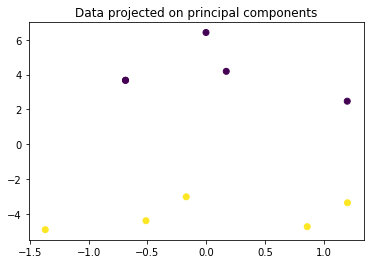

In [44]:
plt.scatter(pc[:,0],pc[:,1]  ,marker='o',c=y)
plt.title('Data projected on principal components')
plt.show()

In [45]:
fc=(eigenValue[0]/(eigenValue[0]+eigenValue[1]))*100
sc=(eigenValue[1]/(eigenValue[0]+eigenValue[1]))*100
print('PC1 contribution: ',fc,' PC2 contribution: ',sc)

PC1 contribution:  3.6645101059440126  PC2 contribution:  96.335489894056


In [48]:
print(pc)
print(pc[:,0])
print(pc[:,1])

[[-1.70460691e-01 -3.01843389e+00]
 [ 8.59120466e-01 -4.73306582e+00]
 [-2.20550373e-03  6.41404671e+00]
 [ 1.19964085e+00  2.46999227e+00]
 [-6.87256273e-01  3.66983362e+00]
 [-5.12986075e-01 -4.39054043e+00]
 [-1.37030204e+00 -4.90533101e+00]
 [-6.87256273e-01  3.66983362e+00]
 [ 1.70059690e-01  4.18462420e+00]
 [ 1.20164585e+00 -3.36095928e+00]]
[-0.17046069  0.85912047 -0.0022055   1.19964085 -0.68725627 -0.51298608
 -1.37030204 -0.68725627  0.17005969  1.20164585]
[-3.01843389 -4.73306582  6.41404671  2.46999227  3.66983362 -4.39054043
 -4.90533101  3.66983362  4.1846242  -3.36095928]


[-3.01843389 -4.73306582  6.41404671  2.46999227  3.66983362 -4.39054043
 -4.90533101  3.66983362  4.1846242  -3.36095928]


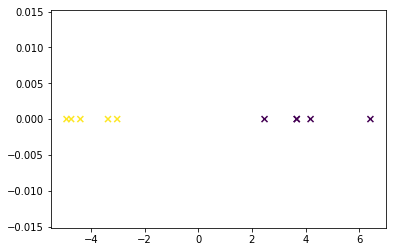

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [53]:
ar=pc[:,1].copy()
print(ar)
val=0
plt.scatter(ar, np.zeros_like(ar) + val , marker='x' ,c=y )
plt.show()
print(np.zeros_like(ar) + val)

In [55]:
fpc1=pc[:,0]
fpc2=pc[:,1]
rows=[]
for p,p2 in zip(fpc1, fpc2):
    #contribution_1=p*eigenVector[0]
    contribution_2=p2*eigenVector[1]
    row=avg+contribution_1+contribution_2
    rows.append(row)
    print(row)
rows=np.array(rows)

[14.  5.]
[16.  5.]
[6. 0.]
[10.  1.]
[8. 2.]
[15.  6.]
[15.  7.]
[8. 2.]
[8. 1.]
[15.  4.]


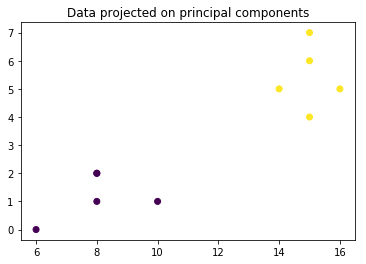

In [56]:
plt.scatter(rows[:,0],rows[:,1]  ,marker='o',c=y)
plt.title('Data projected on principal components')
plt.show()